In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)


In [128]:
df = pd.read_csv("/content/Mountain.csv")

In [129]:
df.shape

(1645, 5)

In [130]:
df.head()

,Mountain,Metres,Feet,Range,Location
0,Mount Everest,8848.0,29029,Himalayas,Nepal/China
1,K2,8612.0,28255,Karakoram,Pakistan/China
2,Kangchenjunga,8586.0,28169,Himalayas,Nepal/India
3,Lhotse,8516.0,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485.0,27838,Himalayas,Nepal


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Mountain  1645 non-null   object 
 1   Metres    1645 non-null   float64
 2   Feet      1645 non-null   int64  
 3   Range     498 non-null    object 
 4   Location  1530 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 64.4+ KB


In [132]:
df["Metres"] = df["Metres"].astype(float)

In [133]:
df.isna().sum()

Mountain       0
Metres         0
Feet           0
Range       1147
Location     115
dtype: int64

In [134]:
df.isna().mean()*100

Mountain     0.000000
Metres       0.000000
Feet         0.000000
Range       69.726444
Location     6.990881
dtype: float64

In [135]:
df["Range"].sample(10)

1483    NaN
977     NaN
411     NaN
1248    NaN
1566       
1361    NaN
1621       
1383    NaN
818     NaN
740     NaN
Name: Range, dtype: object

In [136]:
df['Range'].fillna("Unknown", inplace=True)

In [137]:
# if 'Range' column is empty replace with "Unknown"
df['Range'].fillna("Unknown", inplace=True)

In [138]:
for item in df["Range"].tail(1):
  for char in item:
    print(hex(ord(char)))
    print(f"Here is the char: {char}")


0xa0
Here is the char:  
0xa0
Here is the char:  


In [139]:
df["Range"] = df["Range"].str.replace("  ","unknown")

In [140]:
df.tail()

,Mountain,Metres,Feet,Range,Location
1640,Mount Pleasant,5.00,16,,"Texas, US – Shortest Mountain in Texas"
1641,Mount Tenpō,4.53,15,,"Osaka, Japan"
1642,Tianzhong Mountain,3.60,12,,"Henan Province, China"
1643,Mount Hiroyama,3.00,10,,"Sendai, Japan – Shortest Mountain in Japan"
1644,Jing Mountain [yue],0.60,2,,"Shandong Province, China – Shortest Mountain i..."


In [141]:
df["Range"] = df["Range"].str.replace("Â Â	", "Unknown")

In [145]:
df.head()

,Mountain,Metres,Feet,Location
0,Mount Everest,8848.0,29029,Nepal/China
1,K2,8612.0,28255,Pakistan/China
2,Kangchenjunga,8586.0,28169,Nepal/India
3,Lhotse,8516.0,27940,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485.0,27838,Nepal


In [144]:
df.drop(columns=["Range"], inplace=True)

In [148]:
df.sort_values(by="Metres", ascending=False).head(10)

,Mountain,Metres,Feet,Location
0,Mount Everest,8848.0,29029,Nepal/China
1,K2,8612.0,28255,Pakistan/China
2,Kangchenjunga,8586.0,28169,Nepal/India
3,Lhotse,8516.0,27940,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485.0,27838,Nepal
5,Cho Oyu,8188.0,26864,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167.0,26795,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163.0,26781,Nepal
8,Nanga Parbat,8126.0,26660,Pakistan
9,Annapurna,8091.0,26545,Nepal – First eight-thousander to be climbed (...


<Axes: title={'center': 'Top 10 Mountains by Metres'}, xlabel='Mountain'>

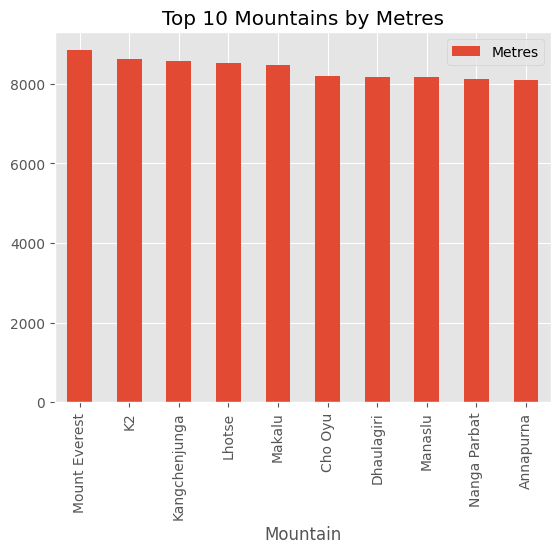

In [151]:
df.sort_values(by="Metres", ascending=False).head(10).plot(kind="bar", x="Mountain", y="Metres", title="Top 10 Mountains by Metres")

In [153]:
df["Location"].value_counts()

Location
Pakistan                                                                                 49
Canadian Rockies                                                                         33
Vanoise massif, France                                                                   33
Romania                                                                                  28
Antarctica                                                                               20
                                                                                         ..
Chiriquí, Panama                                                                          1
Quetta Sraghurgai, Suleman Range, Pakistan – 2nd Highest Peak in Balochistan Province     1
Virunga Mountains, DRC                                                                    1
Ruby Mountains, Nevada                                                                    1
Shandong Province, China – Shortest Mountain in China                  

<Axes: title={'center': 'Top 15 Locations with most mountains'}, xlabel='Location'>

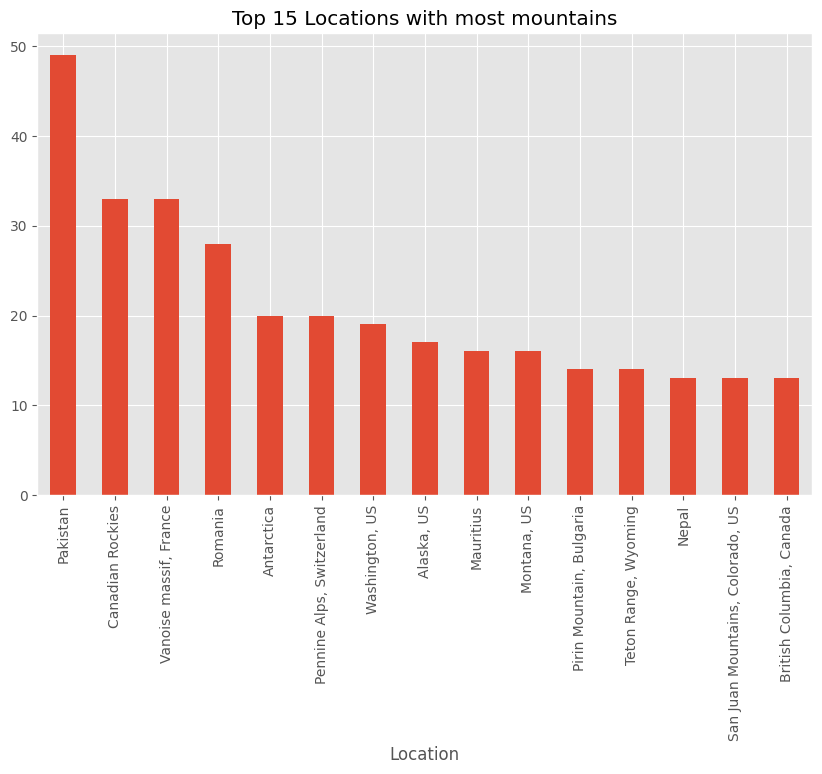

In [157]:
df["Location"].value_counts().head(15).plot(kind="bar", figsize=(10, 6), title="Top 15 Locations with most mountains")

In [158]:
df.columns

Index(['Mountain', 'Metres', 'Feet', 'Location'], dtype='object')

In [176]:
df.groupby("Location")[["Mountain", "Metres"]].sum().sort_values(by="Metres",ascending=False).head(10)

,Mountain,Metres
Location,,
Pakistan,Nanga ParbatGasherbrum IIIGasherbrum IV (K3)Di...,349303.0
"Vanoise massif, France",Dent ParrachéePointe de la FournacheDôme de la...,112626.0
Canadian Rockies,North Twin PeakMount ClemenceauMount AlbertaMo...,111219.0
Nepal,MakaluManasluAnnapurna IIAnnapurna IIIAnnapurn...,97433.0
China,ShishapangmaNamcha BarwaGurla MandhataKongur T...,92136.0
"Pennine Alps, Switzerland",Dunantspitze (Monte Rosa)DomWeisshornTäschhorn...,85150.0
India (Uttarakhand),Nanda DeviKametHardeolChaukhambaTrisulSatopant...,58196.0
"Sawatch Range, Colorado, US",Mount ElbertMount HarvardLa Plata PeakMount An...,56248.0
Antarctica,Mount SidleyMount MintoMount SteereMount Takah...,55837.0


In [186]:
# list the name of the mountains by location

list_of_mountains = df.groupby("Location")[["Mountain"]].sum().head(10)

In [191]:
df.loc[df['Location'] == "Nepal"]

,Mountain,Metres,Feet,Location
4,Makalu,8485.0,27838,Nepal
7,Manaslu,8163.0,26781,Nepal
16,Annapurna II,7937.0,26040,Nepal
47,Annapurna III,7555.0,24787,Nepal
52,Annapurna IV,7525.0,24688,Nepal
63,Gangapurna,7455.0,24459,Nepal
76,Churen Himal,7371.0,24183,Nepal
101,Langtang Lirung,7227.0,23711,Nepal
103,Annapurna South,7219.0,23684,Nepal
110,Gurja Himal,7193.0,23599,Nepal


<Axes: title={'center': 'Top 10 Mountains in Nepal'}, xlabel='Mountain'>

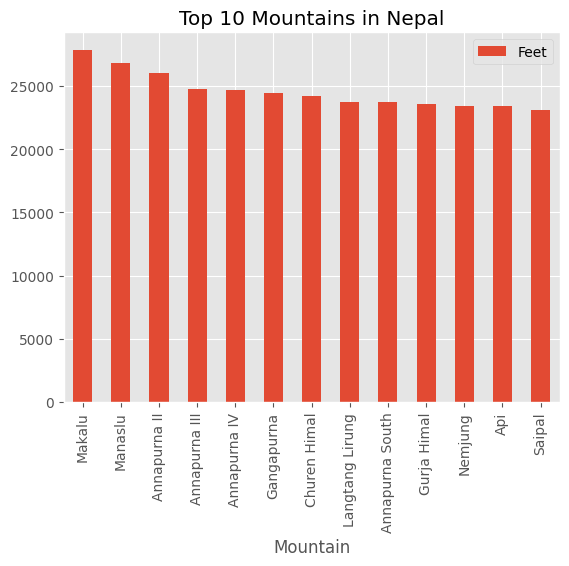

In [192]:
df.loc[df['Location'] == "Nepal"].plot(kind="bar", x="Mountain", y="Feet", title="Top 10 Mountains in Nepal")

In [193]:
df.head(1)

,Mountain,Metres,Feet,Location
0,Mount Everest,8848.0,29029,Nepal/China


In [194]:
df.loc[df["Location"] == "Nepal/China"]

,Mountain,Metres,Feet,Location
0,Mount Everest,8848.0,29029,Nepal/China
106,Langtang Ri,7205.0,23638,Nepal/China
124,Gauri Sankar,7134.0,23406,Nepal/China
139,Salasungo,7043.0,23107,Nepal/China


<Axes: title={'center': 'Top Mountains in Nepal/China'}, xlabel='Mountain', ylabel='Height in feet'>

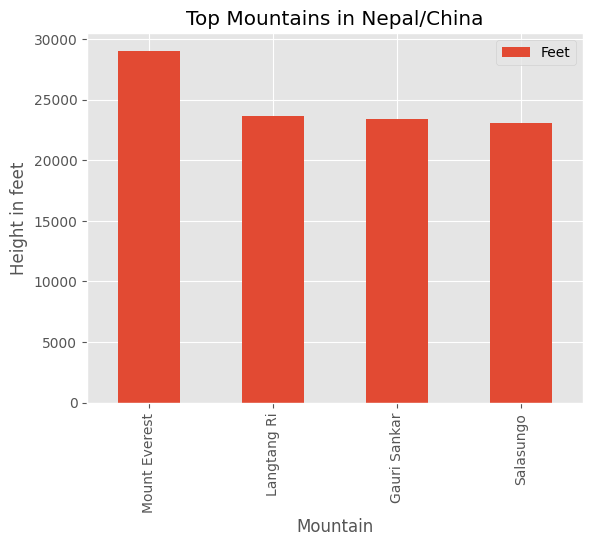

In [196]:
df.loc[df["Location"] == "Nepal/China"].plot(kind="bar", x="Mountain", y="Feet",ylabel="Height in feet", title="Top Mountains in Nepal/China")

In [208]:
df.loc[((df['Location'] == 'Nepal') | (df['Location'] == "Nepal/China") | (df['Location'] == "Nepal/India")) & (df['Metres'] <= 8000)]

,Mountain,Metres,Feet,Location
16,Annapurna II,7937.0,26040,Nepal
47,Annapurna III,7555.0,24787,Nepal
52,Annapurna IV,7525.0,24688,Nepal
63,Gangapurna,7455.0,24459,Nepal
76,Churen Himal,7371.0,24183,Nepal
101,Langtang Lirung,7227.0,23711,Nepal
103,Annapurna South,7219.0,23684,Nepal
106,Langtang Ri,7205.0,23638,Nepal/China
110,Gurja Himal,7193.0,23599,Nepal
119,Nemjung,7140.0,23425,Nepal


In [206]:
df[df['Location'] == "Nepal/India"]

,Mountain,Metres,Feet,Location
2,Kangchenjunga,8586.0,28169,Nepal/India


<Axes: title={'center': 'Mountains that are below 8000M from Nepal'}, xlabel='Mountain', ylabel='Height in feet'>

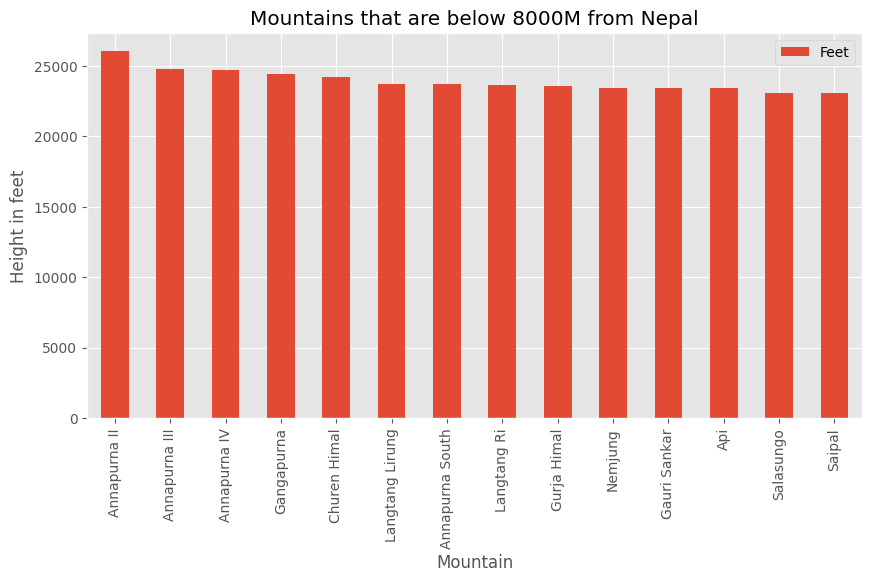

In [210]:
df.loc[((df['Location'] == 'Nepal') | (df['Location'] == "Nepal/China") | (df['Location'] == "Nepal/India")) & (df['Metres'] <= 8000)]\
.plot(kind="bar", figsize=(10,5), x="Mountain", y="Feet",ylabel="Height in feet", title="Mountains that are below 8000M from Nepal")

In [219]:
df.head(10).value_counts("Location")

Location
Nepal                                                     2
Nepal/China                                               1
Nepal/India                                               1
Nepal– Climbers ascend Lhotse Face in climbing Everest    1
Nepal– Considered "easiest" eight-thousander              1
Nepal– First eight-thousander to be climbed (1950)        1
Nepal– Presumed world's highest from 1808-1838            1
Pakistan                                                  1
Pakistan/China                                            1
Name: count, dtype: int64

In [218]:
# if the location has "Nepal " and other character like replace string with "Nepal"
df["Location"] = df["Location"].str.replace("Nepal\s", "Nepal", regex=True)

In [225]:
df['Location'].sample(10)

856                         Vanoise massif, France
996                              Pyrenees, Andorra
928                       Lewis Range, Montana, US
185                                            NaN
1305    Vancouver Island, British Columbia, Canada
704                                      Idaho, US
1097                                       Réunion
880                         Vanoise massif, France
1441                           Tasmania, Australia
107                                   Bhutan/China
Name: Location, dtype: object

In [226]:
df.loc[((df['Location'] == 'Nepal') | (df['Location'] == "Nepal/China") | (df['Location'] == "Nepal/India")) & (df['Metres'] <= 8000)]

,Mountain,Metres,Feet,Location
16,Annapurna II,7937.0,26040,Nepal
47,Annapurna III,7555.0,24787,Nepal
52,Annapurna IV,7525.0,24688,Nepal
63,Gangapurna,7455.0,24459,Nepal
76,Churen Himal,7371.0,24183,Nepal
101,Langtang Lirung,7227.0,23711,Nepal
103,Annapurna South,7219.0,23684,Nepal
106,Langtang Ri,7205.0,23638,Nepal/China
110,Gurja Himal,7193.0,23599,Nepal
119,Nemjung,7140.0,23425,Nepal


In [236]:
# find any rows that has Nepal word in a string in Location column

df.loc[df["Location"].str.contains("Nepal", na=False)].shape[0]

39

<Axes: title={'center': 'Mountains that are from Nepal'}, xlabel='Mountain', ylabel='Height in feet'>

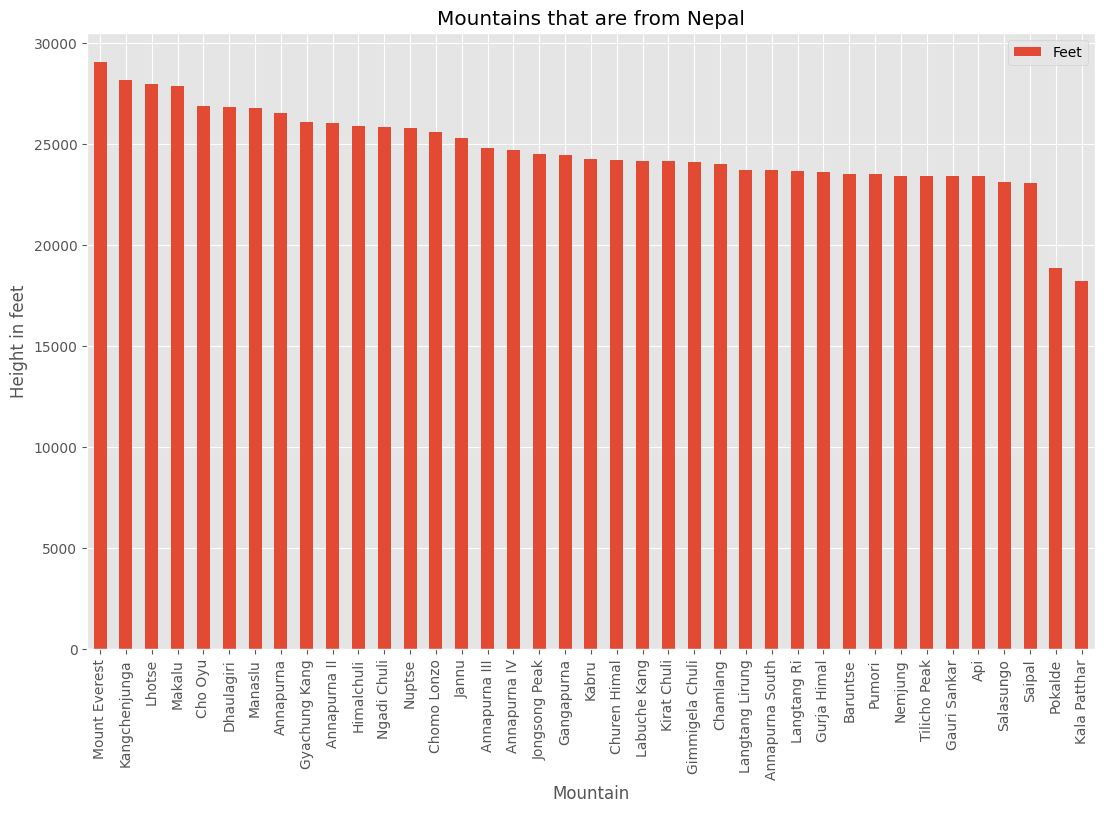

In [241]:
df.loc[df["Location"].str.contains("Nepal", na=False)]\
.plot(kind="bar", figsize=(13, 8), x="Mountain", y="Feet",ylabel="Height in feet", title="Mountains that are from Nepal")